# Fysikklabb

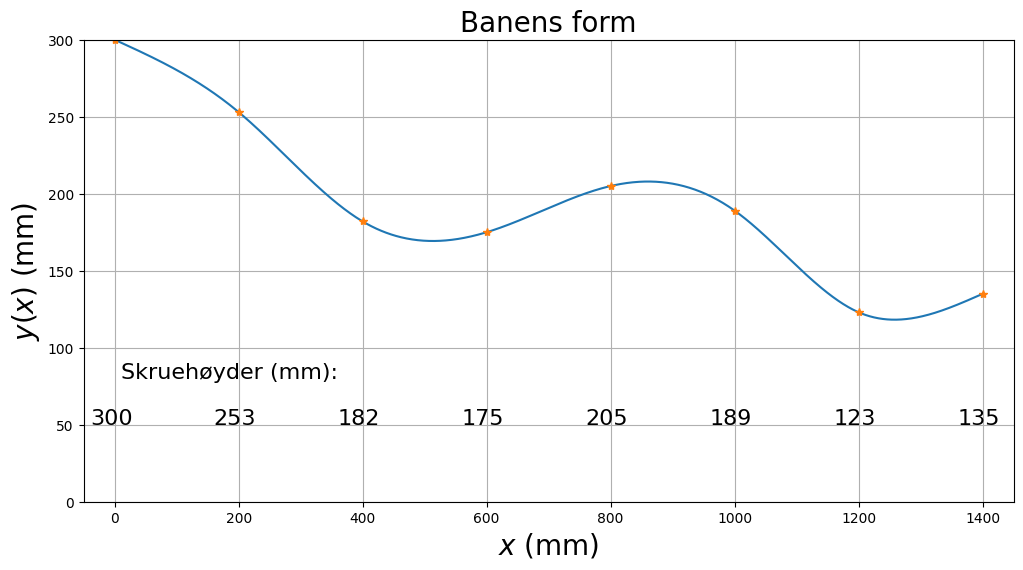

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

xmin = 0
xmax = 1401
dx = 1
x = np.arange(xmin,xmax,dx)

#Skruehøyder:
#yfast = np.zeros(8)
#yfast[0] = 300
#yfast[1] = yfast[0] - np.random.randint(40,60)
#yfast[2] = yfast[1] - np.random.randint(70,90)
#yfast[3] = yfast[2] + np.random.randint(-30,10)
#yfast[4] = yfast[3] + np.random.randint(30,70)
#yfast[5] = yfast[4] + np.random.randint(-20,20)
#yfast[6] = yfast[5] - np.random.randint(40,80)
#yfast[7] = yfast[6] + np.random.randint(-40,40)
#
#print(yfast)
Data = [300, 253, 182, 175, 205, 189, 123, 135]
h = 200
xfast=np.asarray([0,1,2,3,4,5,6,7])*h
cs = CubicSpline(xfast,Data,bc_type='natural')
y = cs(x)
dy = cs(x,1)
d2y = cs(x,2)

yfast = Data.copy()
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y,xfast,yfast,'*')
plt.title('Banens form', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$y(x)$ (mm)',fontsize=20)
plt.text(10,80,'Skruehøyder (mm):', fontsize=16)
plt.text(-40, 50, int(yfast[0]), fontsize=16)
plt.text(160, 50, int(yfast[1]), fontsize=16)
plt.text(360, 50, int(yfast[2]), fontsize=16)
plt.text(560, 50, int(yfast[3]), fontsize=16)
plt.text(760, 50, int(yfast[4]), fontsize=16)
plt.text(960, 50, int(yfast[5]), fontsize=16)
plt.text(1160, 50, int(yfast[6]), fontsize=16)
plt.text(1360, 50, int(yfast[7]), fontsize=16)
plt.ylim(0,300)
plt.xlim(-50,1450)
plt.grid()
plt.show()
#plt.savefig("Baneform", dpi = 600)
#Ta bort # hvis du ønsker å lagre grafen som pdf og/eller png.
#baneform.savefig("baneform.pdf", bbox_inches='tight')
#baneform.savefig("baneform.png", bbox_inches='tight')




Høyeste punkt etter 3.skrue (mm):  208
Laveste punkt etter 2.skrue (mm):  118
Starthelningsvinkel (grader): -10.4
Maksimal helningsvinkel (grader): 21.5
Minste krumningsradius (mm):  297
Festepunkthøyder (mm): [300, 253, 182, 175, 205, 189, 123, 135]
1.5198252906682541


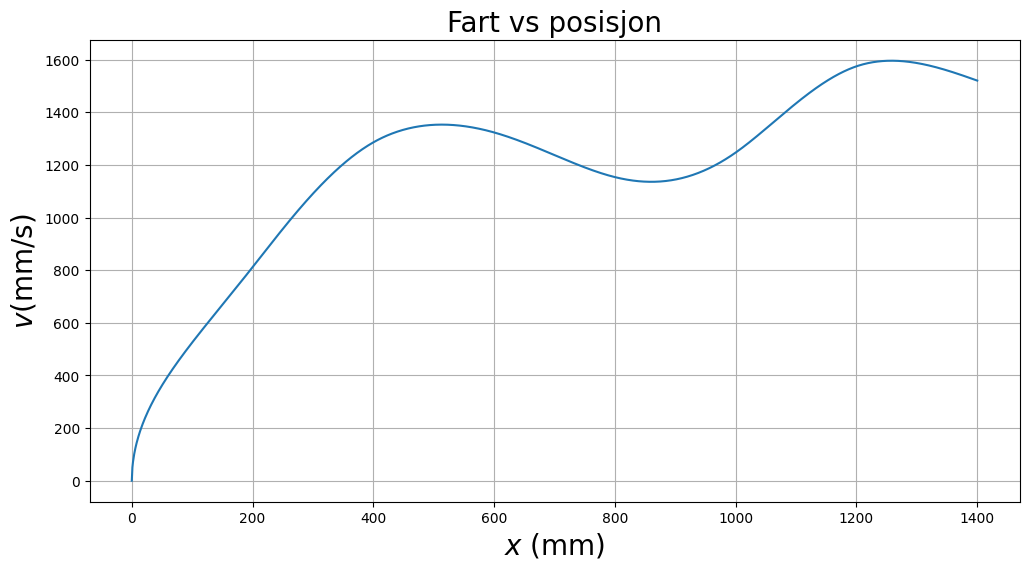

In [22]:
y37 = y[400:1400]
y27 = y[200:1400]
y37min = np.min(y37)
y37max = np.max(y37)
y27min = np.min(y27)
y27max = np.max(y27)
K = d2y/(1+dy**2)**(1.5)
R = 1/(np.abs(K)+1E-8)  #unngår R = uendelig
Rmin = np.min(R)
beta = np.arctan(dy)
betadeg = beta*180/np.pi
startvinkel = betadeg[0]
maksvinkel = np.max(np.abs(betadeg))

print('Høyeste punkt etter 3.skrue (mm): %4.0f' %y37max)
print('Laveste punkt etter 2.skrue (mm): %4.0f' %y27min)
print('Starthelningsvinkel (grader): %4.1f' %startvinkel)
print('Maksimal helningsvinkel (grader): %4.1f' %maksvinkel)
print('Minste krumningsradius (mm): %4.0f' %Rmin)
print('Festepunkthøyder (mm):', yfast)

def finn_farten(y):
    c = 2/5
    y0 = 300
    g = 9810
    v = np.sqrt(2*g*(y0-y)/(1+c))
    
    return v

def plot_fart(y):
    v = finn_farten(y)
    fart = plt.figure('y(x)',figsize=(12,6))
    plt.plot(x, v)
    plt.title('Fart vs posisjon', fontsize=20)
    plt.xlabel('$x$ (mm)',fontsize=20)
    plt.ylabel('$v$(mm/s)',fontsize=20)
    plt.grid()
    plt.savefig("fart.png", dpi = 600)

print(finn_farten(cs(1401))/1000)
plot_fart(y)

0.05012415543716009


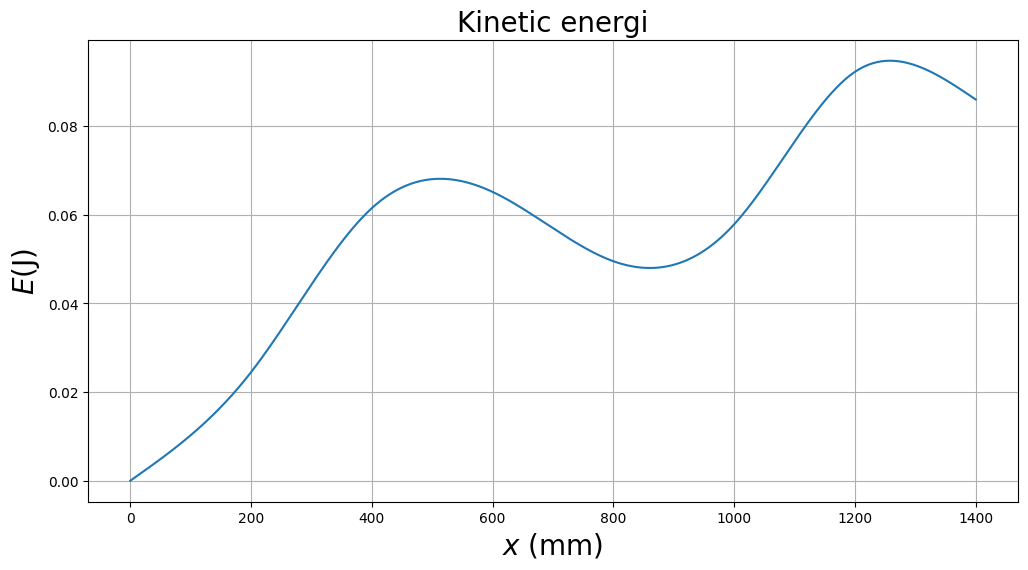

In [23]:


#kinetisk energi er gitt som 1/2*mv**2
def simulert_kinetic(y):
    #Total kinetisk energi K er summen av transelasjonsenergi mv**2/2 og rotasjonsenergi c*m*v**2/2
    #E = U = m*g*y_0
    #Konstanter:
    m = 0.031 #kg
    r = 0.011 #m
    c = 2/5
    Kinetic = ((1+c)/2)*m*(finn_farten(y)/1000)**2 + (m * (finn_farten(y)/1000)**2)/2
    
    return Kinetic
    
def plot_kinetic(y): 
    
    Kinetic = simulert_kinetic(y) 
    kin = plt.figure('y(x)',figsize=(12,6))
    plt.plot(x, Kinetic)
    plt.title('Kinetic energi', fontsize=20)
    plt.xlabel('$x$ (mm)',fontsize=20)
    plt.ylabel('$E$(J)',fontsize=20)
    plt.grid()
    plt.savefig("Kinetisk_energi", dpi =600)



plot_kinetic(y)
print((((1+2/5)/2)*0.031*(finn_farten(cs(1401))/1000)**2))


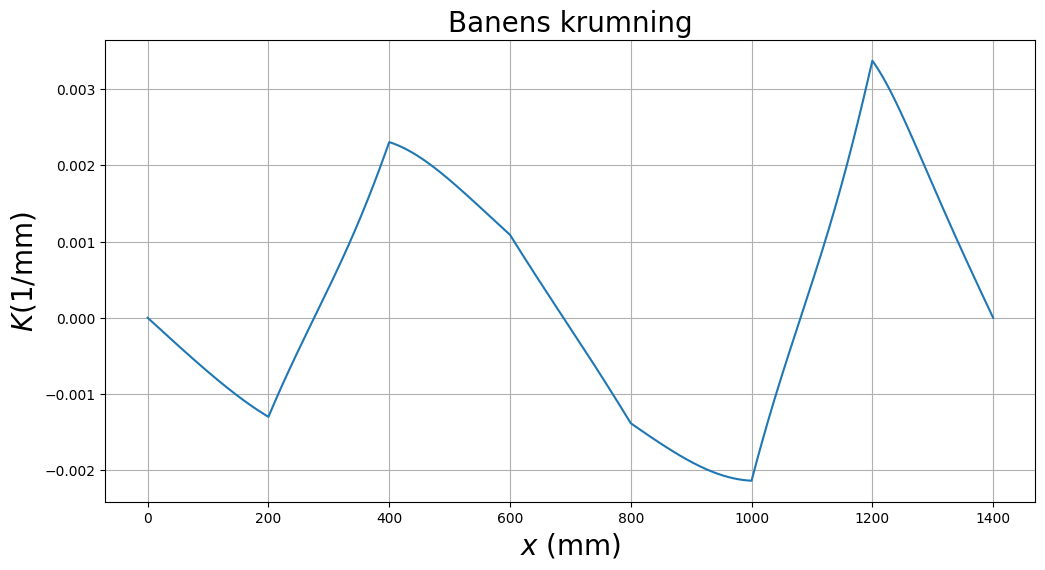

In [24]:
kappa = d2y/((1+(dy)**2)**(3/2))

Krumning = plt.figure('y(x)',figsize=(12,6))


plt.plot(x,kappa)
plt.title('Banens krumning', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$K$(1/mm)',fontsize=20)
plt.grid()
plt.show()



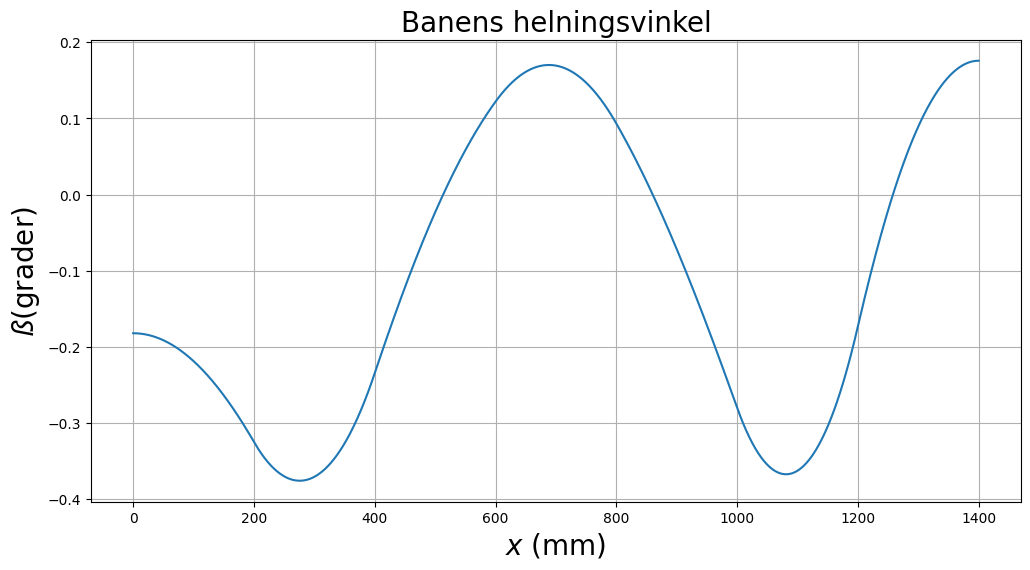

In [25]:

beta = np.arctan(dy)

vinkel = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,beta)
plt.title('Banens helningsvinkel', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$ß$(grader)',fontsize=20)
plt.grid()
plt.show()

In [26]:
def finn_tid():
    delta_v_x = np.zeros(len(y))
    delta_t = np.zeros(len(y))
    V = finn_farten(y)
    t = np.zeros(len(y))
    for i in range(1,1401):
        delta_v_x[i] = 1/2* (V[i]-V[i-1])* np.cos(beta[i])
        delta_t[i] = 2* delta_v_x[i]/(V[i]+V[i-1])* np.cos(beta[i])
        t[i] = t[i-1]+delta_t[i]
    return t[i]

finn_tid()

2.569745721797162

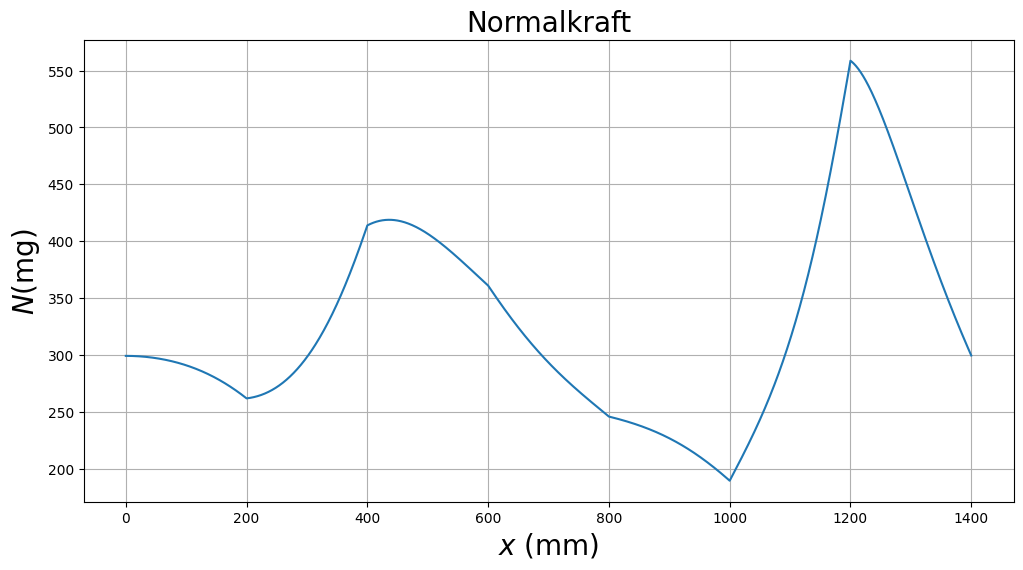

In [27]:
def sentripetalakselerasjon():
    a_ = (finn_farten(y)**2)*kappa
    return a_



def normalKraft():
    g = 9810    
    m = 0.031
    N = m*(g*np.cos(beta)+sentripetalakselerasjon())
    return N
  

def plot_normalkraft():
    kraft = plt.figure('y(x)',figsize=(12,6))
    plt.plot(x,normalKraft())
    plt.title('Normalkraft', fontsize=20)
    plt.xlabel('$x$ (mm)',fontsize=20)
    plt.ylabel('$N$(mg)',fontsize=20)
    plt.grid()
    plt.show()

plot_normalkraft()

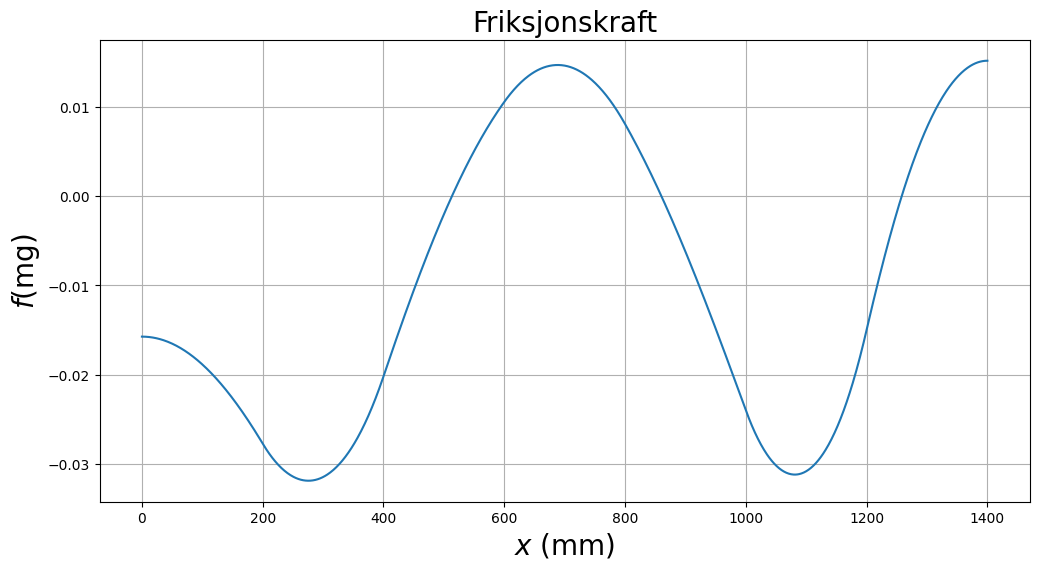

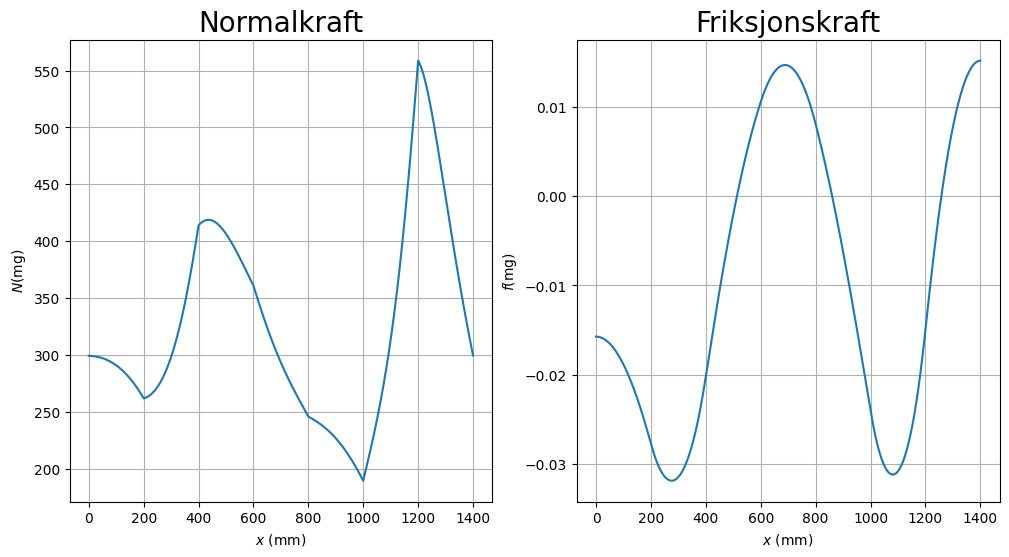

In [28]:
def friksjon():
    #Konstanter
    c = 2/5
    m = 0.031 #kg
    g = 9810 #mm/s**2
    return (c/(1+c)*m*g*np.sin(beta))/1000

def plot_friksjon():
    kraft = plt.figure('y(x)',figsize=(12,6))
    plt.plot(x,friksjon())
    plt.title('Friksjonskraft', fontsize=20)
    plt.xlabel('$x$ (mm)',fontsize=20)
    plt.ylabel('$f$(mg)',fontsize=20)
    plt.grid()
    plt.show()

plot_friksjon()

def plot_fric_and_norm():
    #plot friction and norm as two subplots next to eachother in one figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    ax1.plot(x,normalKraft())
    ax1.set_title('Normalkraft', fontsize=20)
    ax1.set_xlabel('$x$ (mm)',fontsize=10)
    ax1.set_ylabel('$N$(mg)',fontsize=10)
    ax1.grid()
    ax2.plot(x,friksjon())
    ax2.set_title('Friksjonskraft', fontsize=20)
    ax2.set_xlabel('$x$ (mm)',fontsize=10)
    ax2.set_ylabel('$f$(mg)',fontsize=10)
    ax2.grid()
    plt.savefig("Normalkraft_og_friksjonskraft", dpi = 600)
    
    
plot_fric_and_norm()

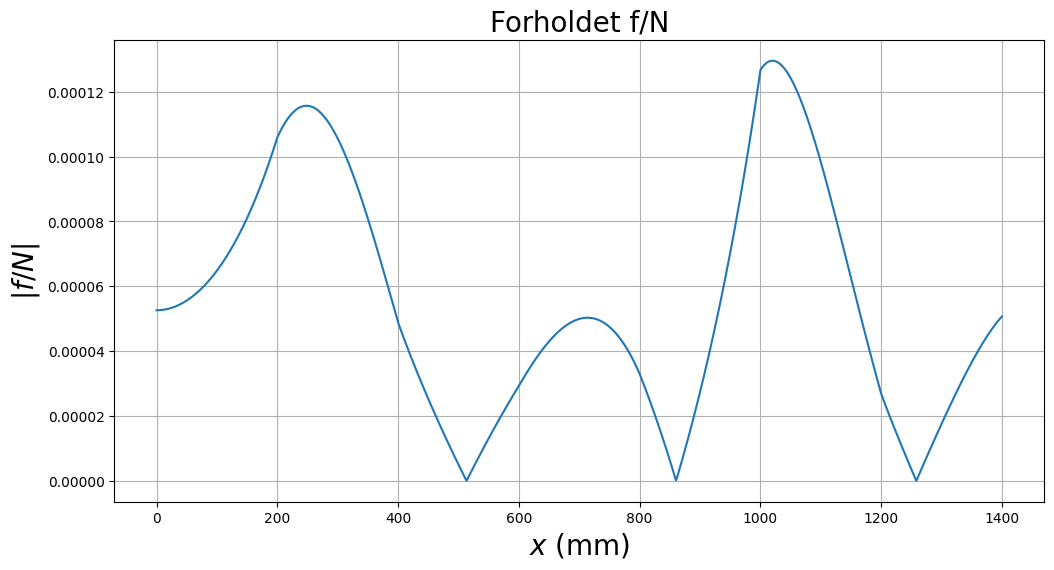

In [29]:
def plot_NdF():
    F = friksjon()
    N = normalKraft()
    NF = np.abs(F/N)
    kraft = plt.figure('y(x)',figsize=(12,6))
    plt.plot(x,NF)
    plt.title('Forholdet f/N', fontsize=20)
    plt.xlabel('$x$ (mm)',fontsize=20)
    plt.ylabel('$|f/N$|',fontsize=20)
    plt.grid()
    plt.show()

plot_NdF()

In [30]:
h_start = 0.287 #[m]

h_slutt = 0.155 #[m]

m_kule = 0.037 #[kg]

V_slutt = [1.391,1.377,1.35828 ,1.36367, 1.407, 1.361, 1.343, 1.345, 1.3435, 1.343, 1.339] #[m/s]

rulletid = [1.55, 1.54, 1.500, 1.5333, 1.500, 1.533, 1.500, 1.567, 1.533, 1.433] #[s]


def gjennomsnitt_rulletid():
    rulletid_sum = sum(rulletid)/len(rulletid)       
    return rulletid_sum

def gjennomsnitt_sluttfart():
    V_slutt_sum = sum(V_slutt)/len(V_slutt)        
    return V_slutt_sum

g = 9.81 #[m/s**2]
def tap_mekanisk_energi(): 
    Energi_sum = 0
    #finner gjennomsnittstap på de ti forsøkene
    
    for i in V_slutt:
        Energi_sum = h_start*g*m_kule - (i**2 * 0.5 * m_kule + m_kule*g*h_slutt)

    Energitap_gjennomsnitt = Energi_sum/10
    
    
    return Energitap_gjennomsnitt 

def tap_mekanisk_energi_liste():
    liste =[]
    for i in V_slutt:
        Energi_sum = h_start*g*m_kule - (i**2 * 0.5 * m_kule + m_kule*g*h_slutt)
        liste.append(Energi_sum)

    return liste 

print(gjennomsnitt_rulletid())
print(gjennomsnitt_sluttfart())
print(tap_mekanisk_energi())

1.51893
1.361040909090909
0.0014743001499999992


In [31]:
def total_kinetisk():
    kin_sum = 0
    for i in V_slutt:
        m = 0.031 #[kg]
        r = 0.011
        c = 2/5 #[Geometrisk massefordelingskonstant]
        Kinetic = ((1+c)/2)*m*i**2 + (m * i**2)/2 #[J]
        kin_sum =+ Kinetic

    kin_gjennomsnitt = kin_sum/len(V_slutt)

    return kin_gjennomsnitt

print(total_kinetisk())

0.006063332836363636


In [32]:
def finn_standaravik(data):
    sum1 = 0
    for value in data:
        sum1 += (value - tap_mekanisk_energi())**2
    
    delta_X = np.sqrt(1/(len(data)-1) * sum1)
    return delta_X

In [33]:
def standarfeil(data):
    standarfeil = finn_standaravik(data)/np.sqrt(len(data))
    return standarfeil


In [34]:
def view_diff():
    diff_list = []
    simulert_hatighet = finn_farten(y)[-1]/1000
    eksprementiell_hastighet = sum(V_slutt) / len(V_slutt)
   
    print(eksprementiell_hastighet)
    print(simulert_hatighet)
    
    diff_list.append(simulert_hatighet-eksprementiell_hastighet)
    
    simulert_rulletid = finn_tid()
    eksprementiell_rulletid = gjennomsnitt_rulletid()
    
    diff_list.append(simulert_rulletid-eksprementiell_rulletid)
    diff_list.append(simulert_kinetic(y)[-1]-total_kinetisk())
    
    
    return diff_list

print(f"Forskjell i hastighet: {view_diff()[0]} \nForskjell i rulletid {view_diff()[1]}\nForskjell i kinetisk energi {view_diff()[2]}")

1.361040909090909
1.5206436607098794
1.361040909090909
1.5206436607098794
1.361040909090909
1.5206436607098794
Forskjell i hastighet: 0.15960275161897042 
Forskjell i rulletid 1.0508157217971623
Forskjell i kinetisk energi 0.07995635287792208


# 1.3 Teori (Linn)

#\subtitle{Teori}
#\subsubtitle{Utledning av formeler}
#\section{
    Energi kan ikke oppstå eller forsvinne, kun gå over i andre former. Det er dette loven om energibevarelse sier. For et villkåelig objekt som forflytter seg i tid og rom vil alltid
    $$
        E_{P_{0}}+ E_{K_{0}}= E_{P}+E_{K}+E_{F}
    $$
    Her er $E_{P_{0}}$ objektets potensielle startenergi og $E_{K_{0}}$ objektets samlede kinetiske startenergi, mens E_{P} er objektets potensielle energi etter en forflytning. For objekter som ruller vil den kinetiske energien være gitt av 
    $$
        K = 1/2 M V^{2} + 1/2 I_{0} \omega^{2}
    $$
    der M hele objekts masse og V er massesenterets fart. $\omega$ er rullebetingelsen, altså massesenterets fart dividert med radiusen, og $I_{0}$ er objektets treghetsmoment som er gitt av
    $$
        I_{0} = c M R^{2}
    $$
    der c er en geometrisk massefordelingskonstant, M er massen og R er radiusen.
    Et objekt som starter i ro fra en høyde $y_{0}$ vil basert på likningene ha en samlet kinetisk energi 
    $$
        E_{K} = 1/2 M V^{2} + 1/2 M c V^{2}
        E_{K} = 1/2 M V^{2} \times{(1 + c)}
    $$
    Gitt at vi har en endring i potensiell energi, $y_{0}-y$ vil man ved å sette inn denne høydeforskjellen i energibavaringsloven løse for farten som dermed er gitt ved
    $$
        V(y) = \sqrt{\frac{2 g (y_{0}-y(x))}{1+c}}
        V(y) = \sqrt{\frac{2 g}{1+c}} \sqrt{(y(s))}
    $$
    Dersom man nå deriverer uttrykket vil vi ende opp med akselerasjonen. Her bruker vi kjærneregelen to ganger siden funksjonen V er egentlig $V(y(x(t)))$ og ender dermed med
    $$
        A = \frac{dV}{dt} = \frac{dV}{dy} \frac{dy}{ds} \frac{ds}{dt}
        A = \sqrt{\frac{2 g}{1+c}} frac{1}{2\sqrt{y}} \sin(\beta) V 
    $$
    når vi setter inn for farten V kan mye kannselleres og vi ender opp med
    $$
        A = \frac{g sin \beta}{1+c}
    $$
         Her er altså g gravitasjonskonstanten, $\beta$ helningsvinkelen og c den geometriske konstanten for objektets treghetsmoment.
    Newtons 2. lov sier at summen av et systems ytre krefter er lik systemets masse ganget med akselerasjonen. 
    $$
        \sum F = m \times a
    $$ 
    På et skråplan med helning $\beta$ vil summen av alle krefter som virker på fartsretningen være gitt ved
    $$
        Mg sin(\beta) -f = MA
    $$
    der man kan sette inn det som ble utledet for akselerasjonen for A slik at det blir
    $$
        Mg sin(\beta) -f = \frac{Mg sin \beta}{1+c}
    $$
    Løser for f og får
    $$
        f = \frac{c Mg sin \beta}{1+c}
    $$
    Friksjonskraften f er nødvendig for at en kule skal trille nedover et skråplan. Likevel vil ikke friksjonskraften utføre noe arbeid på en kule der rullebetingelsen er oppfylt. Det vil si $\omega R - V = 0$. Dette kommer av at hastigheten punktet på kula som er nær bakken vil alltid være 0. 
    For kreftene som virker normalt på fartsretningen vil Newtons 2. lov kunne benyttes. Uttrykket for akselerasjonen $A\perp$ er gitt ved 
    $$
        A\perp = frac{-v^{2}}{r}
        A\perp = frac{V^{2}}{\rho}
    $$
    der $rho$ er krumningsradiusen som er gitt ved
    $$
        \rho = \frac{(1 + (y')^{2})^{frac{3}{2}}}{|y''|}
    $$
    Dermed blir uttrykket for $A\perp$
    $$
        A\perp = frac{V^{2} |y''|}{(1 + (y')^{2})^{frac{3}{2}}}
    $$
    Der y er høyden i banen som funksjon av x.
Dersom en ser kreftene som virker i høyden og setter inn for F får vi 
    $$
        N - mg cos(\beta) = M A\perp
        N = M A + mg cos(\beta)
    $$
Der N er normalkraften, m er massen, g er gravitasjonskonstanten og \beta er helningsvinkelen, altså vinkelen mellom underlaget og referansekoordinatsystemet, samt A\prep er sentripetalakselerasjonen. Sentripetalakselerasjonen er gitt i likning XXXXXX som totalt sett gir 
$$
    N = frac{M V^{2} |y''|}{(1 + (y')^{2})^{frac{3}{2}}} + mg cos(\beta)
$$


# Metode 
Vi starter prosjektet med bestemme baneformen på forsøket, dette bestemmes fra den tildelte koden som kan ses her. ---ref-----. Deretter blir alle de nøyvendige funksjonene laget som fart, kinetisk energi, krumning, helningsvinkel, tiden, normalkraft oog friksjonskraft. HVordan disse blir beregnet ligger i teorien.  

Vi har nå kommet til forsøk delen. Her blir en kompakt gummikule med massen lik 37g slippes fra en bestemt høyde og går igjennom banen. Bevegelsen til kulen blir filmet 10 ganger og videoene blir puttet inn i programmet Tracker. I Tracker bruker vi verktøyet Calibrium Stick for å definere 1 meter. Vi har en meter stokk i bunn som vi bruker den Calibrium Stick på. Vi putter også koordinatsystemet nederst til venstre i banen. I Tracker bruker vi verktøyet Point Mass Autotracker for å spore bevegelsen til gummikula og få farten og posisjonen til kula gjennom banen. Vi tok ut sluttfarten og tiden den brukte for å komme seg igjennom banen og brukte de opplysningene til analysen videre. 

Etter forsøket må vi først finne middelverdiene til rulletid og sluttfart. vi kan bruke disse verdiene til å finne tap av mekanisk energi, standaravvik og standarfeil. disse verdiene blir så diskutert i diskusjonsdelen.

# Resultater ()
## Simulering
Det ble brukt numerisk analyse for å få en modell på hvordan kulen ville bevege seg gjennom kulebanen. Banen ble satt opp ved å benytte seg av startverdien 300 også generere tilfeldige tall som skapte en bane. Alle beregningene ble gjort ved å lage pythonskript for å gjøre utregningene og plotte grafene. Banens form ble bestemt til å være en parabel som gikk gjennom hydene 300, 253, 182, 175, 205, 189, 123, 135 gitt i mm med intevaller på 200mm i x retning.

![Baneform](Baneform.png)

Vi beregnet rulletiden til å være 2.57sek ved hjelp av funksjonen ```finn_tid()``` i apendex A. Videre brukte vi funksjonen ````plot_fart(y) ```` for å plotte farten til kulen gjennom banen. Farten ble beregnet til å være 1.5m/s ved slutten av banen. Merk at plottet viser hastighet i mm/s.

![Fart](Fart.png)

Videre ble friksjon og normalkraft plottet ved hjelp av de egne funksjonene ``` normalKraft() ``` og ```` friksjon() ````. Normalkraften ble beregnet til å være 300 N(mg) ved slutten av banen. Friksjonen ble beregnet til å være 0.01 f(mg) ved slutten av banen.

![Normalkraft](Normalkraft_og_friksjonskraft.png)

Den kinetiske energien ble regnet ut til å være 50J ved slutten av banen. Endringen i kinetisk energi med henysn på plassering på banen i x-retning kan ses i figuren under.

![Kinetisk energi](Kinetisk_energi.png)

## Eksperiment
Resultatene funnet i den eksprimentetlle delen ble funnet slik det er representert i metode delen, hvor tallene er hentet fra verktøyet 'Tracker'.

#### Rulltid
Ved bruk av 'Tracker' brukte vi 'gjennomsnitt_rulletid()' (fra Apendix linje x) til å finne gjennomsnittsfarten fra de 10 forskjellige forsøkene. Ved kjøring av koden fikk vi at den gjennomsnittlige rulletiden var tilnærmet lik 1.52 sekunder. Vi sammenlignet dettte med 'finn_tid()' (fra Apendix linje x), som viser den teoretiske tiden kulen skulle brukt. Da fikk vi ut at den teoretiske tiden var tilnærmet lik 2.57 sekunder, som gir oss et avik på 1.05 sekunder. Dette peker til at det enentuelt ligger en feil  til stede siden 1 sekund avik ikke er neglisjerbart.

#### Slutthastighet
Ved lignende metode som ved funnet av rulletid fant vi sluttfarten til kulen ved bruk av 'Tracker'. Vi puttet deretter de 10 verdiene inn i funksjoenen 'gjennomsnitt_sluttfart()' (fra Apendix linje x) og fant at basert på eksprimentet så er den gjennomsnittlige sluttfarten tilnærmet lik 1.36 m/s. Den teoretiske sluttfarten ble funnet ved å sette 'y = cs(1401)' og putte dette inn i funksjonen 'finn_farten(y)' (fra Apendix linje x). Resultatet for den teoretiske sluttfarten ble tilnærmet lik 1.52 m/s, som gir et avik på 0.16 m/s. 

#### Kinetisk energi i sluttpunkt
Den kinetiske energien ble funnet ved bruk av funksjonen 'total_kinetisk()' (fra Apendix linje x) og slutt fart verdiene funnet fra 'Tracker'. Den gjennomsnittlige totale kinetiske energi igjen i kulen når sluttfarten ble målt var (Sjekk tall). 

(Skal r brukes og m satt til 0.31, tror funksjoene burde sees over, tror også den ene er i mm/s mens den andre er i m/s)

#### Tap av mekanisk energi
Tapet av mekanisk energi ble funnet ved bruk av funksjonen 'tap_mekanisk_energi()' (fra Apendix linje x). Her fikk vi en verdi av 0.00147 (hva?). 

#### Visualisert
Vi lagde også en funkjson 'view_diff()' (fra Apendix linje x) (skal vi ta med dette?)

# Diskusjon

#### Resultatene

Vi har fått en forskjell på simulert og eksperimentell verdier som var uventet. Den simulerte hastigheten var høyere i gjennomsnitt enn de eksperimentelle. Det var uventet fordi antagelsene som å fjerne friksjon og luftmotstand skulle egentlig gjøre den eksperimentelle hastigheten større enn den simulerte. Det gir en indikasjon på hvor liten friksjonen og luftmotstanden er, og at det derfor er fornuftig å neglisjere de. Årsaken for forskjellen i slutthastighet kommer nok fra feil i baneformen. Det observeres også innen rulletid og den kinetiske energien i sluttpunktet. Den kinetiske energien var i gjennomsnitt større for den simulerte enn den eksprementielle, og rulletiden til den eksperimentelle var i gjennomsnitt ett sekund lengre enn den simulerte. Det er en stor forskjell, som mest sannsynlig kommer fra mange bidrag.
 
 #### Bidrag til avvik

Et annet bidrag kan være at kula får et lite «dytt» som gir ballen en startfart ulik null. Det vil gi kula en økt fart igjennom hele kulebanen. Det er nok usannsynlig at startfarten har gitt noe stort bidrag for feilmarginen. Det er fordi differansen på resultatene er liten, og et bidrag i startfart som er så jevnt er veldig usannsynlig. 
Et annet bidrag kan være målefeil. Det kan ligge i at vi måler feil tyngde og radius på kula, banen er unøyaktig satt opp og at oppsettet av banen og kameraoppsettet i forsøket er feil satt opp. Dersom kamera er feil satt opp kan det føre til perspektivfeil, som igjen kan føre til unøyaktige koordinatposisjoner i aksesystemet. Dersom banen vår blir satt opp på feil høyde, vil det gi et stort bidrag på feilmarginen.